<a href="https://www.kaggle.com/mohamedbakrey/mnist-using-different-models-in-deep-learning?scriptVersionId=88414415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <html> <center>  Introduction.</center></html>
 **In this notebook, many methods and networks that concern and work on deep learning will be explained mainly, as each time a specific idea is added in a different way so that we are able to learn greatly, benefit and benefit from each other. Here, of course, the famous data (MNIST) is used, which is Which we work on all the time. We hope to learn together by adding your opinion in the comments if you see something that should be added to this netbook and do not forget to vote so that everyone can see it and be able to learn.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.layers import Flatten, concatenate

# Loading Data

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train Data:", x_train.shape)
print("Train Data:", y_train.shape)
print("Train Data:", x_test.shape)
print("Train Data:", y_test.shape)

Train Data: (60000, 28, 28)
Train Data: (60000,)
Train Data: (10000, 28, 28)
Train Data: (10000,)


# compute the number of labels

In [4]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [5]:
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)


Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [8]:
# input image dimensions
image_size = x_train.shape[1]

In [9]:
print("Image Size:", image_size)

Image Size: 28


# Resize and Normalize

In [10]:
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

In [11]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


# Network Parameters

In [14]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Using CNN 

In [15]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape))


model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

2022-02-21 18:05:45.161814: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Plot the Summary by using plot_model

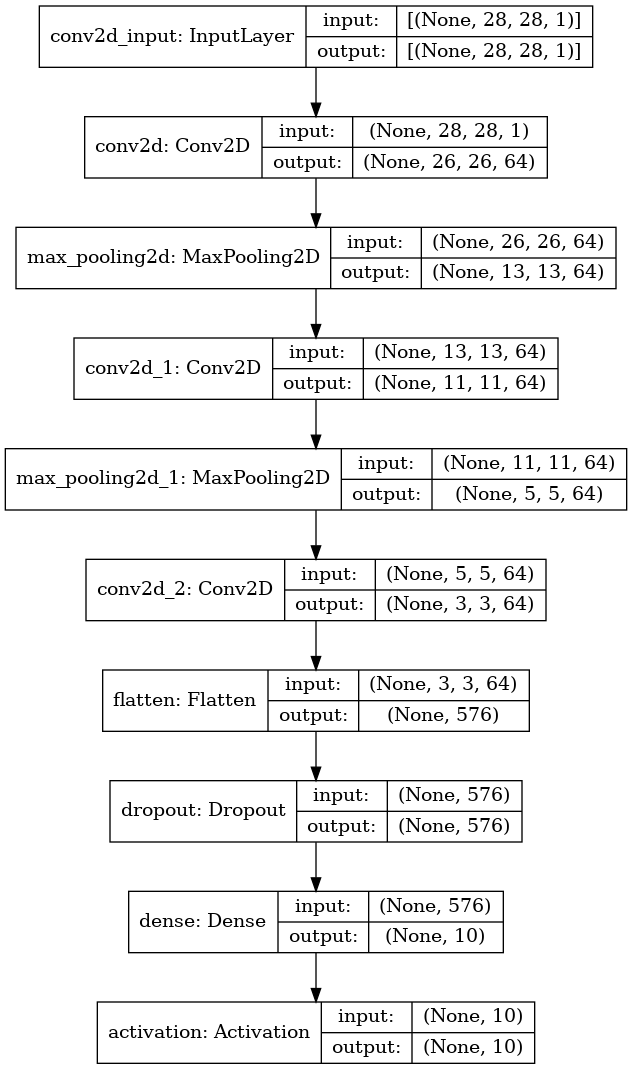

In [16]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [17]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [18]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

2022-02-21 18:05:45.665857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
469/469 [==============================] - 32s 66ms/step - loss: 0.2589 - accuracy: 0.9200
Epoch 2/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0699 - accuracy: 0.9779
Epoch 3/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0500 - accuracy: 0.9844
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0411 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0220 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 10/10
469/469 [==============================] - 29s 63ms/step - loss: 0.018

In [19]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 2s 20ms/step - loss: 0.0260 - accuracy: 0.9923


In [20]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.2%


# Using RNN Network

In [21]:
# load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [22]:
# compute the number of labels
num_labels = len(np.unique(Y_train))

In [23]:
# convert to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [24]:
# resize and normalize
image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1, image_size, image_size])
X_test = np.reshape(X_test,[-1, image_size, image_size])

In [25]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [26]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [27]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
dropout=dropout,
input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


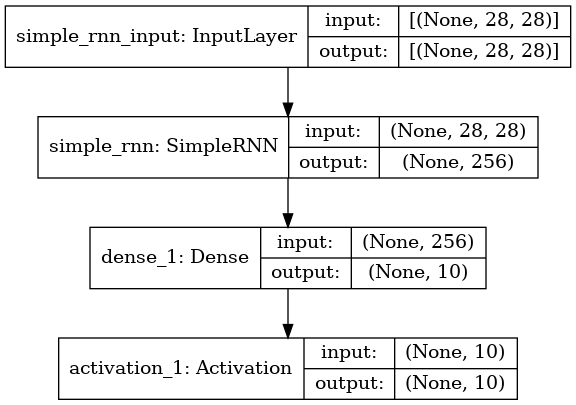

In [28]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [29]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

In [30]:
# train the network
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 20s 41ms/step - loss: 0.7390 - accuracy: 0.7889
Epoch 2/20
469/469 [==============================] - 19s 41ms/step - loss: 0.3112 - accuracy: 0.9091
Epoch 3/20
469/469 [==============================] - 20s 42ms/step - loss: 0.2308 - accuracy: 0.9314
Epoch 4/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1895 - accuracy: 0.9432
Epoch 5/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1657 - accuracy: 0.9502
Epoch 6/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1454 - accuracy: 0.9565
Epoch 7/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1325 - accuracy: 0.9600
Epoch 8/20
469/469 [==============================] - 20s 43ms/step - loss: 0.1217 - accuracy: 0.9640
Epoch 9/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1138 - accuracy: 0.9653
Epoch 10/20
469/469 [==============================] - 19s 41ms/step - loss: 0.107

In [31]:
_, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)


In [32]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.1%


# Using CNN Network By Functinal API 

In [33]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [34]:
# load MNIST dataset
(x2_train, y2_train), (x2_test, y2_test) = mnist.load_data()

In [35]:
# from sparse label to categorical
num_labels = len(np.unique(y2_train))
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [36]:
print("Trian :",y2_train.shape)
print("Test :",y2_test.shape)

Trian : (60000, 10)
Test : (10000, 10)


In [37]:
# reshape and normalize input images
image_size = x2_train.shape[1]
x2_train = np.reshape(x2_train,[-1, image_size, image_size, 1])
x2_test = np.reshape(x2_test,[-1, image_size, image_size, 1])


In [38]:
print("X2 Trian:",x2_train.shape)
print("X2 Trian:",x2_test.shape)

X2 Trian: (60000, 28, 28, 1)
X2 Trian: (10000, 28, 28, 1)


In [39]:
x2_train = x2_train.astype('float32') / 255
x2_test = x2_test.astype('float32') / 255

In [40]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

##  Use functional API to build cnn layers

In [41]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)

# image to vector before connecting to dense layer
y = Flatten()(y)


# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

In [42]:
# network model in text
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0     

In [43]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [44]:
# train the model with input images and labels
model.fit(x2_train,
                y2_train,
                validation_data=(x2_test, y2_test),
                epochs=20,
                batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 32s 66ms/step - loss: 0.2678 - accuracy: 0.9181 - val_loss: 0.0580 - val_accuracy: 0.9827
Epoch 2/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0412 - val_accuracy: 0.9861
Epoch 3/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 4/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 5/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0243 - val_accuracy: 0.9915
Epoch 6/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0265 - val_accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0263 - val_accuracy:

In [45]:
# model accuracy on test dataset
score = model.evaluate(x2_test,
                            y2_test,
                            batch_size=batch_size,
                            verbose=0)

In [46]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.3%


# Using CNN-Y-Network

In [92]:
# load MNIST dataset
(x3_train, y3_train), (x3_test, y3_test) = mnist.load_data()

In [93]:
# from sparse label to categorical
num_labels = len(np.unique(y3_train))
print("The Num_Labels:",num_labels)

The Num_Labels: 10


In [94]:
y3_train = to_categorical(y3_train)
y3_test = to_categorical(y3_test)

In [95]:
print("Y_Train:",y3_train.shape)
print("Y_Test:",y3_test.shape)

Y_Train: (60000, 10)
Y_Test: (10000, 10)


In [96]:
# reshape and normalize input images
image_size = x3_train.shape[1]
x3_train = np.reshape(x3_train,[-1, image_size, image_size, 1])
x3_test = np.reshape(x3_test,[-1, image_size, image_size, 1])

In [97]:
print("X_train:",x3_train.shape)
print("X_test:",x3_test.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [98]:
x3_train = x3_train.astype('float32') / 255
x3_test = x3_test.astype('float32') / 255

In [99]:
print("Train:",x3_train.shape)
print("Test:",x3_test.shape)

Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [100]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

In [101]:
# left branch of Y network
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
        x = Conv2D(filters=filters,
        kernel_size=kernel_size,
        padding='same',
        activation='relu')(x)
        
x = Dropout(dropout)(x)
x = MaxPooling2D()(x)
filters *= 2

# right branch of Y network
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters

# 3 layers of Conv2D-Dropout-MaxPooling2Do
# number of filters doubles after each layer (32-64-128)
for i in range(3):
        y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        padding='same',activation='relu',
        dilation_rate=2)(y)
y = Dropout(dropout)(y)
y = MaxPooling2D()(y)
filters *= 2

# merge left and right branches outputs
y = concatenate([x, y])
# feature maps to vector before connecting to Dense
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)                   

### build the model in functional API

In [102]:
# build the model in functional API
model = Model([left_inputs, right_inputs], outputs)

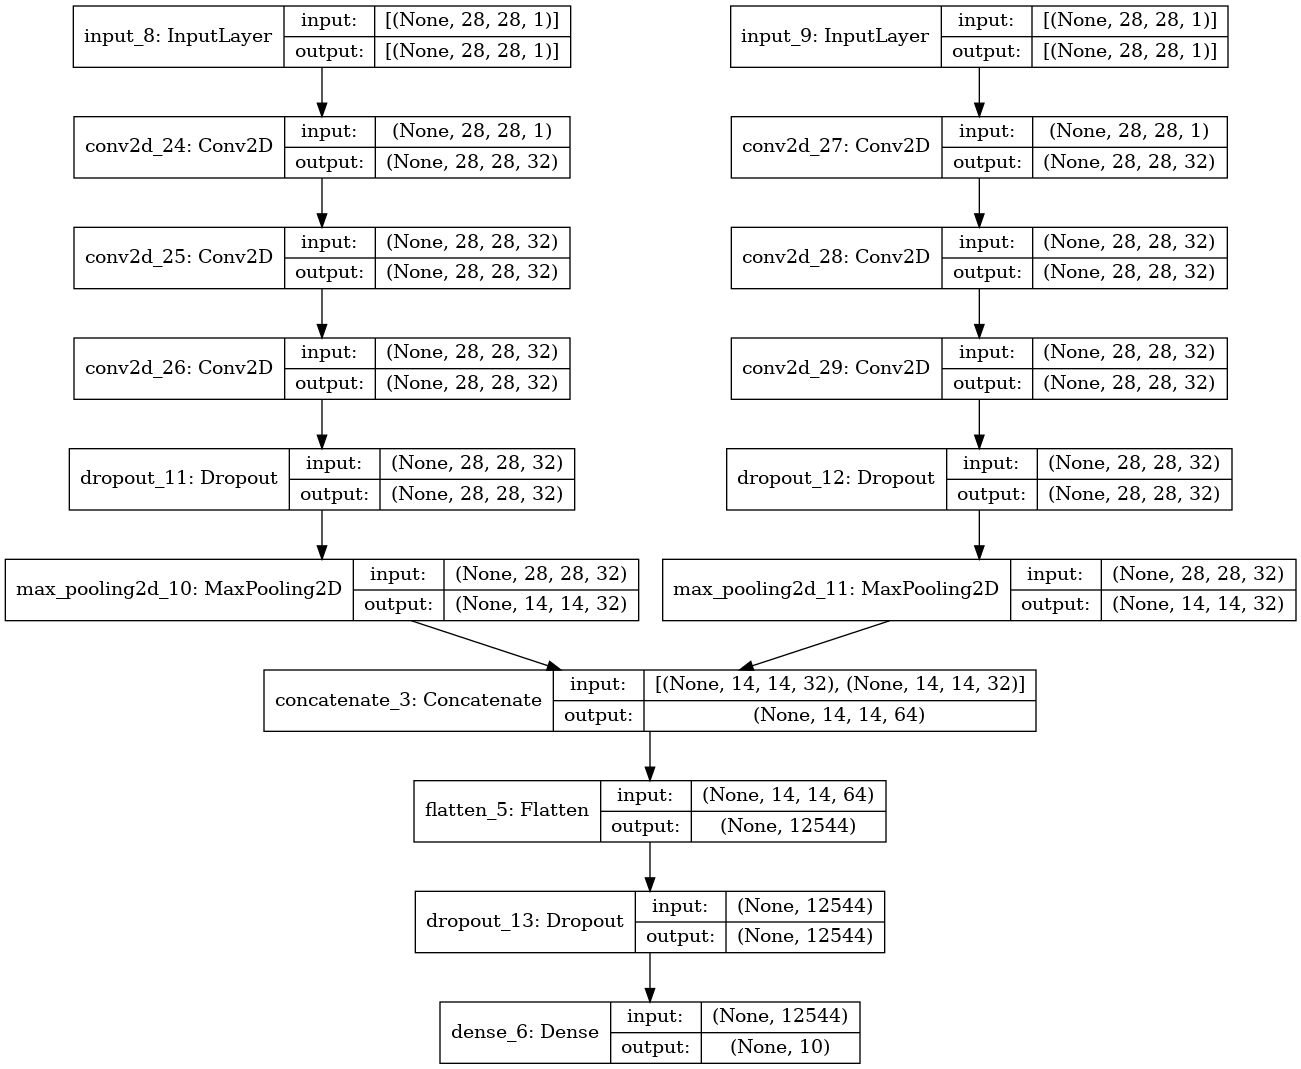

In [103]:
# verify the model using graph
plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

In [104]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 28, 28, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 28, 28, 32)   320         input_9[0][0]                    
____________________________________________________________________________________________

In [105]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
                                            optimizer='adam',
                                            metrics=['accuracy'])

In [106]:
# train the model with input images and labels
model.fit([x3_train, x3_train],
                            y3_train,
                            validation_data=([x3_test, x3_test], y3_test),
                            epochs=20,
                            batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 181s 96ms/step - loss: 0.1313 - accuracy: 0.9601 - val_loss: 0.0493 - val_accuracy: 0.9859
Epoch 2/20
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 3/20
1875/1875 [==============================] - 181s 96ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 4/20
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0315 - val_accuracy: 0.9891
Epoch 5/20
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 6/20
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0

In [107]:
# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                                        y_test,
                                        batch_size=batch_size,
                                        verbose=0)


In [108]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.2%
